In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns

from utils import FEATURES_DIR, RESULTS_DIR
from analyses.ridge_regression_decoding import NUM_CV_SPLITS, DISTANCE_METRICS

import pickle

from notebook_utils import load_results_data, plot_metrics

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_data = load_results_data()

all_data["alpha"] = all_data.alpha.astype("category")

distance_metric = 'cosine'
all_data

,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
0,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_loss,0.948725
1,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_rsa,0.033049
2,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,rsa,0.191820
3,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine,0.871429
4,1000.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine_captions,0.834369
...,...,...,...,...,...,...,...,...,...,...,...
11425,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,rsa,0.089533
11426,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine,0.693582
11427,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine_captions,0.647205
11428,10000000.0,visualbert_concat,sub-07,concat,train,test,4.0,False,False,acc_cosine_images,0.815942


## Model selection based on val loss vs. val pairwise acc

(<seaborn.axisgrid.FacetGrid at 0x7f36059869a0>,
             alpha              model subject features training_mode  \
 0          1000.0           clip_avg  sub-01      avg         train   
 1          1000.0           clip_avg  sub-01      avg         train   
 2          1000.0           clip_avg  sub-01      avg         train   
 3          1000.0           clip_avg  sub-01      avg         train   
 4          1000.0           clip_avg  sub-01      avg         train   
 ...           ...                ...     ...      ...           ...   
 11425  10000000.0  visualbert_concat  sub-07   concat         train   
 11426  10000000.0  visualbert_concat  sub-07   concat         train   
 11427  10000000.0  visualbert_concat  sub-07   concat         train   
 11428  10000000.0  visualbert_concat  sub-07   concat         train   
 11429  10000000.0  visualbert_concat  sub-07   concat         train   
 
       testing_mode  fold  best_val_loss  best_val_acc               metric  \
 0    

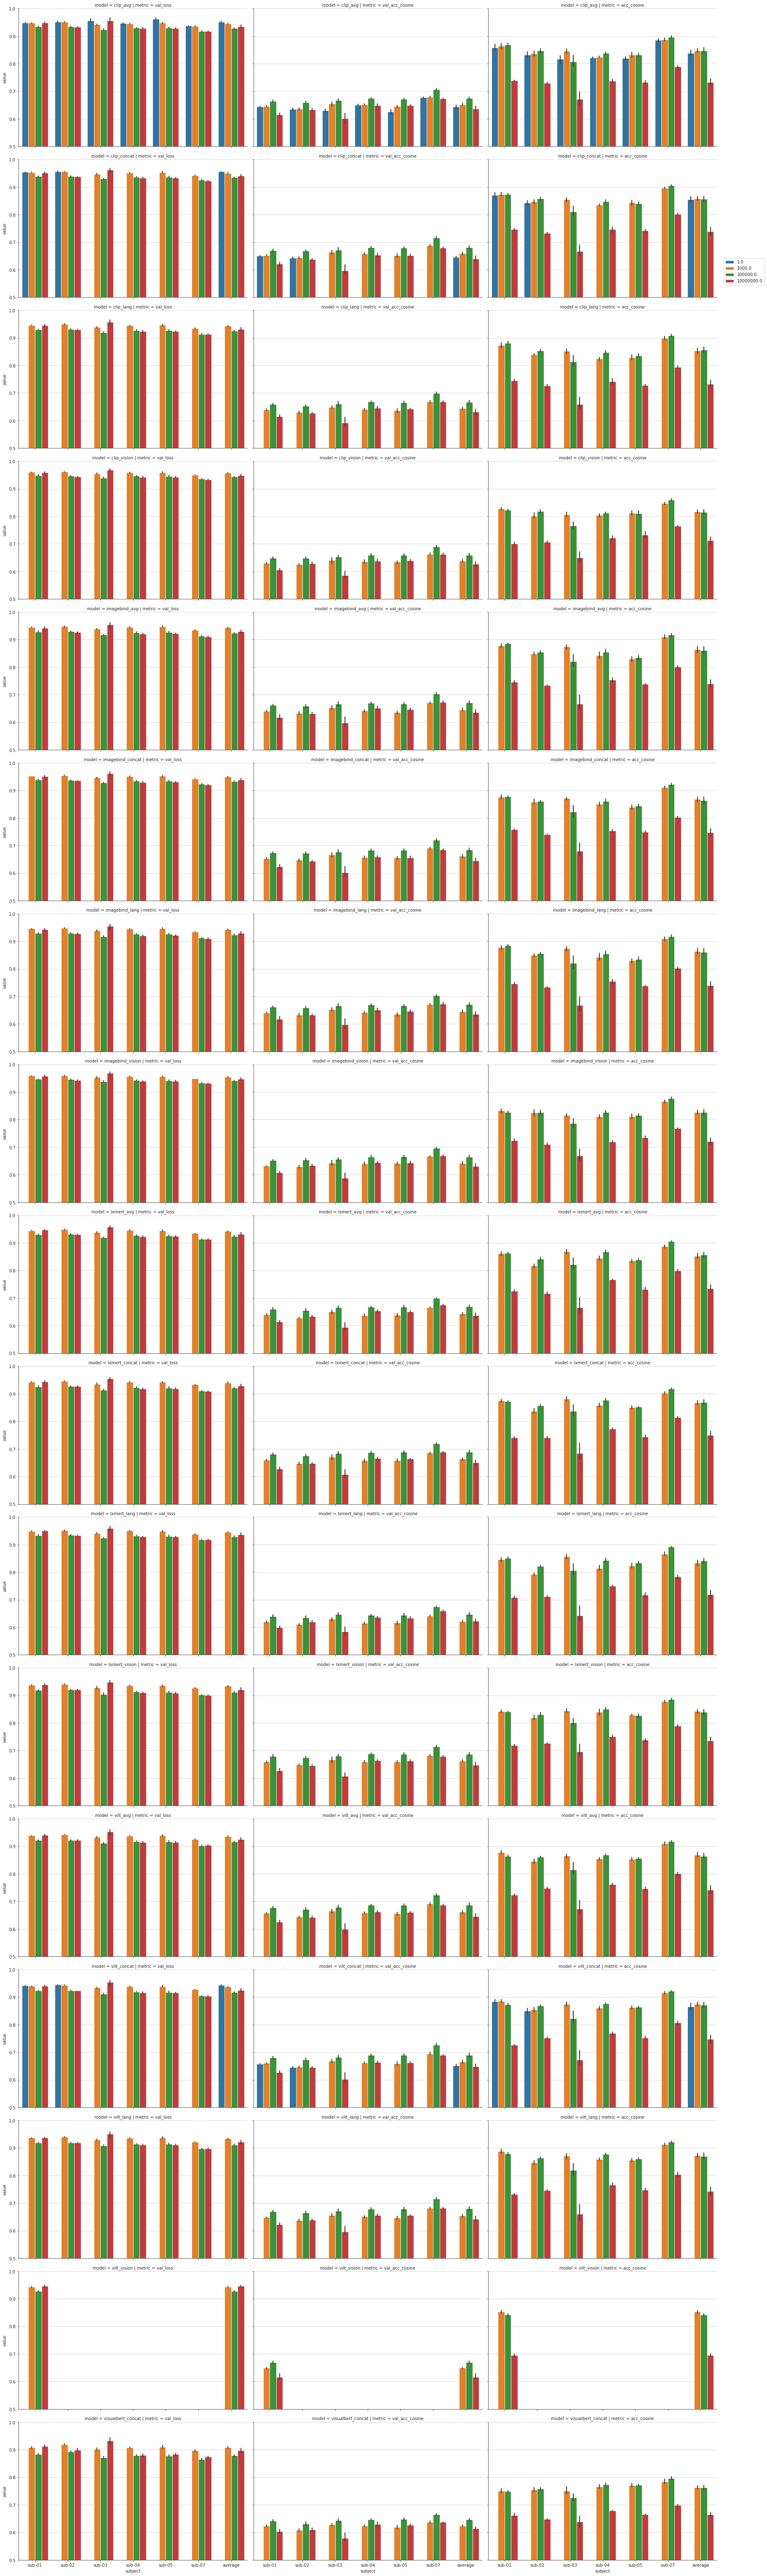

In [3]:
metrics = ['val_loss', f'val_acc_{distance_metric}', f'acc_{distance_metric}'] #, 'val_rsa'

data_to_plot = all_data
data_to_plot = data_to_plot[data_to_plot.best_val_loss == False]
data_to_plot = data_to_plot[data_to_plot.best_val_acc == False]

plot_metrics(data_to_plot, metrics=metrics, ylim=(0.5, 1), hue_variable="alpha", row_variable="model")

## Final training on full training set

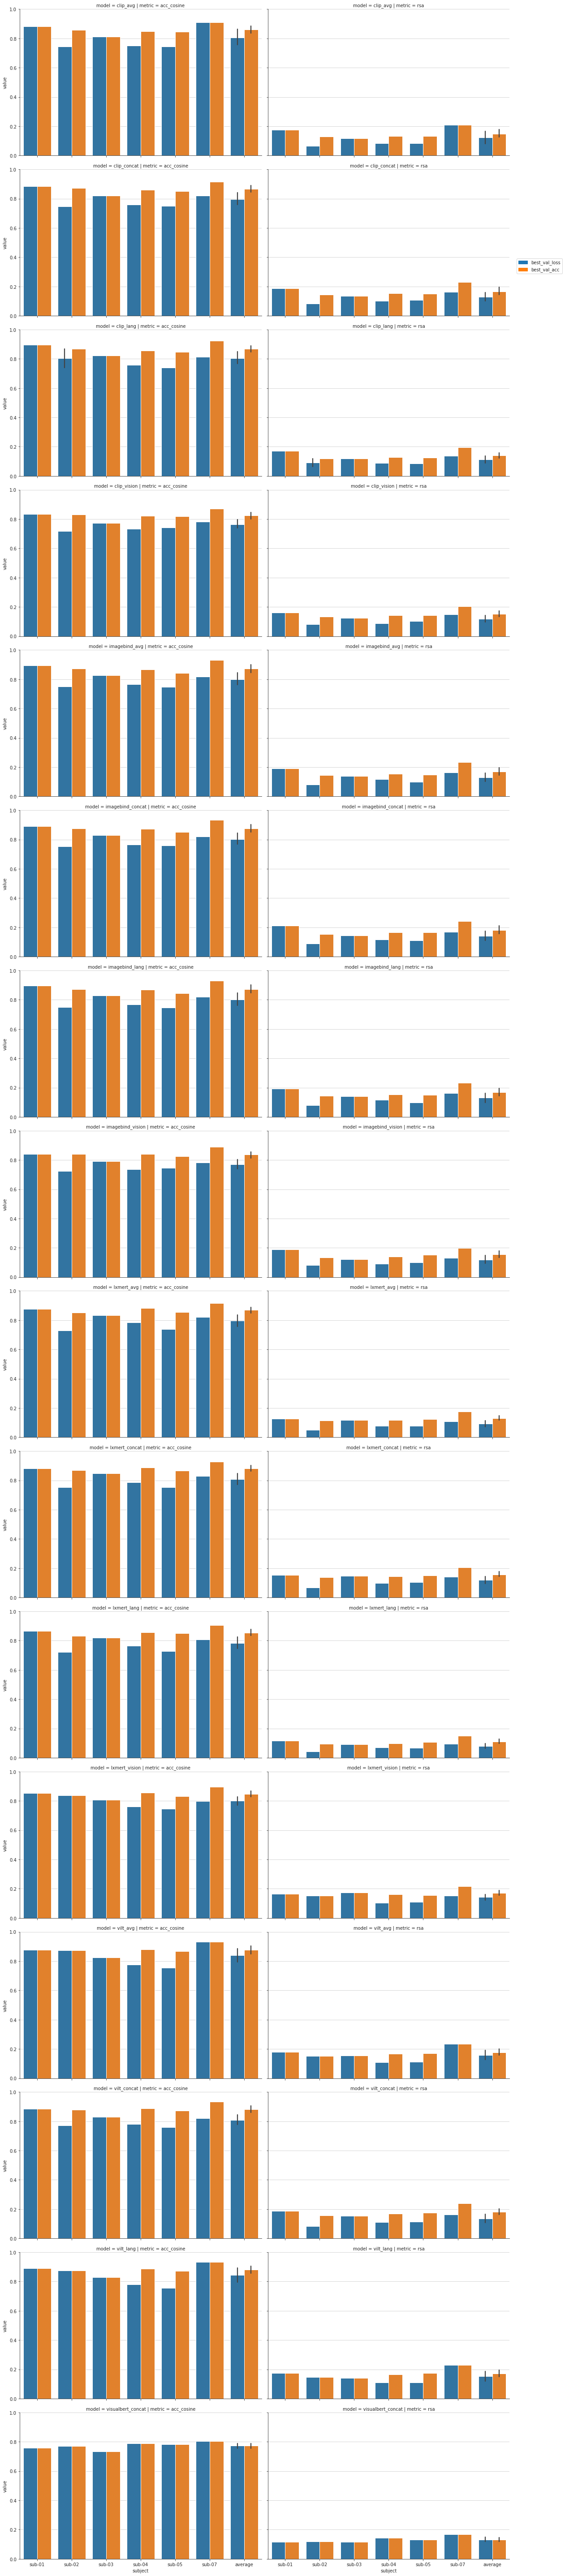

In [4]:
metrics = [f'acc_{distance_metric}', 'rsa']

data_to_plot = all_data
data_to_plot = data_to_plot[(data_to_plot.best_val_loss == True) | (data_to_plot.best_val_acc == True)]

g, _ = plot_metrics(data_to_plot, metrics=metrics, ylim=(0, 1), hue_variable="best_val_acc", row_variable="model", plot_legend=False)

g.fig.legend(handles=[mpatches.Patch(color=sns.color_palette()[0], label='best_val_loss'),  mpatches.Patch(color=sns.color_palette()[1], label='best_val_acc')], loc='upper left', title="", bbox_to_anchor=(1, 0.9))


## 